In this assignment you will build models to predict quality of wines.  Please review the data dictionary and data provenance here:

https://archive.ics.uci.edu/ml/datasets/wine+quality



1. Load the data
2. Explore the distribution of the target variable, recode the target variable as  1 (quality > 6) and 0 (quality < 7).
3. Perform exploratory data analysis
4. Explore the information value and distribution of features using the pairplot

5 pts.


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
wine=pd.read_csv('whitewine-classification (1).csv')

In [ ]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,goodwine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [ ]:
wine.goodwine.mean()

0.21641486320947326

<Axes: >

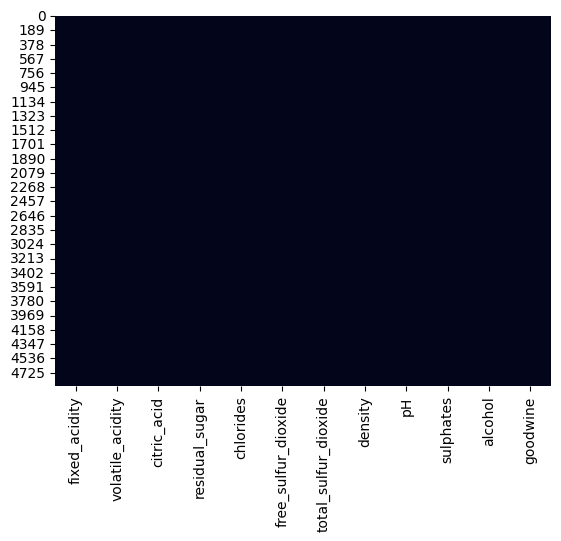

In [ ]:
#ensuring no missing values
sns.heatmap(wine.isnull(), cbar=False)

5. Develop logistic regression, kNN (optimize k), and decision tree models(I think you're only referring to decision tree model and not Boosted Tree/Random Forest) to predict wine quality. Make sure to preprocess the data as needed by the respective models.

6. Assess the performance of each model using the following metrics: Recall, Precision, F1, ROC AUC.  Which is the best model based on ROC AUC?

15 pts.

In [ ]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=wine.drop('goodwine', axis=1)
y=wine['goodwine']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = logmodel.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[1087,   49],
       [ 255,   79]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1136
           1       0.62      0.24      0.34       334

    accuracy                           0.79      1470
   macro avg       0.71      0.60      0.61      1470
weighted avg       0.77      0.79      0.76      1470



In [ ]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
print("ROC AUC Score for Logistic Regression:", logit_roc_auc)

ROC AUC Score for Logistic Regression: 0.7812552711478452


In [ ]:
#KNN
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Using X from Logistic regression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_, columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, wine['goodwine'], test_size=0.3, random_state=1)
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1072   64]
 [ 218  116]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1136
           1       0.64      0.35      0.45       334

    accuracy                           0.81      1470
   macro avg       0.74      0.65      0.67      1470
weighted avg       0.79      0.81      0.79      1470



In [ ]:
print('ROC AUC Score for KNN:', roc_auc_score(y_test,knn.predict_proba(X_test)[:,1]))

ROC AUC Score for KNN: 0.8210129037699249


In [ ]:
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())

In [ ]:
print('Optimal k: ', cv_scores.index(max(cv_scores))+1)

Optimal k:  40


In [ ]:
#Decision Tree
from sklearn import tree
dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1015,  121],
       [ 192,  142]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1136
           1       0.54      0.43      0.48       334

    accuracy                           0.79      1470
   macro avg       0.69      0.66      0.67      1470
weighted avg       0.77      0.79      0.78      1470



In [ ]:
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
print("ROC AUC Score for Decision Tree:", dt_roc_auc)

ROC AUC Score for Decision Tree: 0.7866160285063676


Logistic regression
Precision 0-0.81 1-0.62
Recall 0-0.96 1-0.24
Accuracy 0.79
F1 0-0.88 1-0.34
ROC AUC 0.781

KNN
Precision 0-0.83 1-0.64
Recall 0-0.94 1-0.35
Accuracy 0.81
F1 0-0.88 1-0.45
ROC AUC 0.821

Decision Tree
Precision 0-0.84 1-0.54
Recall 0-0.89 1-0.43
Accuracy 0.79
F1 0-0.87 1-0.48
ROC AUC 0.787

Based on ROC AUC KNN is the best model to use.
